<a href="https://colab.research.google.com/github/asdfasdf0311/Optimal_location_selection/blob/main/02_MCLP_%EC%9B%90%EC%A3%BC%EC%8B%9C%EB%82%B4%EC%A0%84%EC%B2%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [ ]:
#데이터 경로 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2024BIGCON/mclpdata.csv')

* 최종 중요도(인구 밀집도) : 0.5993
* 최종 중요도(유동 인구 수) : 0.1774
* 최종 중요도(관광객 방문) : 0.1031
* 최종 중요도(버스 승하차) : 0.1203

In [ ]:
# '인구수' 열에서 결측치(NaN)가 있는 행 제거
df = df.dropna(subset=['인구수'])
# '인구수'와 '관광객방문수' 열을 int형으로 변환
df['인구수'] = df['인구수'].astype(int)
df['관광객방문수'] = df['관광객방문수'].astype(int)

<ipython-input-5-afdf63fa53d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['인구수'] = df['인구수'].astype(int)
<ipython-input-5-afdf63fa53d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['관광객방문수'] = df['관광객방문수'].astype(int)


In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/2024BIGCON/MCLP/읍면동별data.csv')

In [ ]:
dff

,읍면동,승하차,유동인구,학교총합계,인구수,면적(㎢),인구밀집도,전체버스정류장수
0,지정면,2389,310608,3,3221,89.68,35.92,57
1,반곡관설동,6564,1540559,4,30208,21.00,1438.48,58
2,무실동,5798,1693661,4,35953,9.07,3963.95,31
3,명륜동,6186,186,2,28712,1.87,15354.01,23
4,단구동,9711,2385672,3,46884,3.91,11900.79,37
5,단계동,16431,838865,5,23676,3.68,6433.70,36
6,개운동,6509,1577474,3,14637,1.05,13940.00,14


In [ ]:
df.to_csv('/content/drive/MyDrive/2024BIGCON/MCLP/mlcp_df.csv', index=False)

In [ ]:
df.head()

,버스정류장명,정류장번호,도로명주소,지번주소,위도,경도,기준일,승하차수,읍면동명,총_유동인구수,인구수,관광객방문수,인구밀집도
0,관설동 종점,10023,NaN,강원특별자치도 원주시 관설동 309,37.300581,127.982576,2024-03-31,702,반곡관설동,1540559,30208,198,1438.48
1,기업도시로,10025,NaN,강원특별자치도 원주시 지정면 가곡리 1482,37.372115,127.870087,2024-03-31,31,지정면,310608,3221,89,35.92
2,의료기기종합지원센터,10027,NaN,강원특별자치도 원주시 지정면 가곡리 1322,37.370856,127.873331,2024-03-31,26,지정면,310608,3221,89,35.92
3,누가베스트,10028,NaN,강원특별자치도 원주시 지정면 가곡리 1320,37.370469,127.873924,2024-03-31,51,지정면,310608,3221,89,35.92
4,동부교사거리,10029,NaN,강원특별자치도 원주시 단구동 1506,37.318103,127.969723,2024-03-31,204,단구동,2385672,46884,294,11900.79


## 필요한 라이브러리

In [ ]:
!pip install pandas numpy ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 21.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which is incompatible.
google-cloud-datastore 2.19.0 requires protobuf!=3.20.0,!=3.20.1,!=4.2

In [ ]:
from ortools.linear_solver import pywraplp

## 가중치 적용 및 중요도 계산

In [ ]:
# 가중치 정의
weights = {
    '인구밀집도': 0.5993,
    '유동인구수': 0.1774,
    '관광객방문수': 0.1031,
    '버스승하차': 0.1203
}

# 정규화 함수 정의
def normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val != min_val:
        return (series - min_val) / (max_val - min_val)
    else:
        return pd.Series([0.5]*len(series), index=series.index)

# 각 열을 정규화 (0~1 범위로 스케일링)
df['인구밀집도_norm'] = normalize(df['인구밀집도'])
df['총_유동인구수_norm'] = normalize(df['총_유동인구수'])
df['관광객방문수_norm'] = normalize(df['관광객방문수'])
df['승하차수_norm'] = normalize(df['승하차수'])

# 중요도 계산
df['종합중요도'] = (
    weights['인구밀집도'] * df['인구밀집도_norm'] +
    weights['유동인구수'] * df['총_유동인구수_norm'] +
    weights['관광객방문수'] * df['관광객방문수_norm'] +
    weights['버스승하차'] * df['승하차수_norm']
)

# 중요도 기준으로 정렬
df = df.sort_values(by='종합중요도', ascending=False).reset_index(drop=True)

# 중요도 확인
print(df[['버스정류장명', '종합중요도']])


      버스정류장명     종합중요도
0      롯데시네마  0.774531
1    한신2차아파트  0.755538
2    청솔3차아파트  0.754435
3      현진에버빌  0.752352
4       판부농협  0.751856
..       ...       ...
251     판대1리  0.023085
252       정감  0.023085
253  위병봉기기념탑  0.023085
254      노루골  0.023085
255       지촌  0.023085

[256 rows x 2 columns]


### 설명
* 정규화 함수 정의 (normalize):

각 열을 정규화하기 위해 normalize 함수를 정의했습니다.
이 함수는 시리즈의 최소값과 최대값을 기준으로 0과 1 사이로 스케일링합니다.
만약 최소값과 최대값이 동일하다면(모든 값이 동일한 경우) 모든 값을 0.5로 설정하여 중간값을 할당합니다.


* 정규화 적용:

df['인구수_norm'], df['총_유동인구수_norm'], df['관광객방문수_norm'], df['승하차수_norm'] 컬럼을 각각 정규화했습니다.


* 종합 중요도 계산:

주어진 가중치를 사용하여 각 정류장의 종합 중요도를 계산했습니다.
가중치가 적용된 정규화된 값을 모두 더하여 종합중요도 컬럼을 생성했습니다.


* 정렬:

종합중요도를 기준으로 정렬하여 중요도가 높은 순서대로 정렬했습니다.

## 거리 계산 및 커버리지 매트릭스 생성

In [ ]:
from ortools.linear_solver import pywraplp
from geopy.distance import geodesic
import folium

In [ ]:
# 커버리지 반경 설정 (단위: 미터)
coverage_radius = 500  # 예: 500미터

# 최적화할 시설 수 설정 (예: 3개)
num_facilities = 3

# 모든 정류장 간 거리 계산
num_stations = len(df)
distance_matrix = np.zeros((num_stations, num_stations))

for i in range(num_stations):
    for j in range(num_stations):
        if i == j:
            distance_matrix[i][j] = 0
        else:
            coord1 = (df.loc[i, '위도'], df.loc[i, '경도'])
            coord2 = (df.loc[j, '위도'], df.loc[j, '경도'])
            distance = geodesic(coord1, coord2).meters
            distance_matrix[i][j] = distance

# 커버리지 매트릭스 생성 (1: 커버, 0: 미커버)
coverage_matrix = (distance_matrix <= coverage_radius).astype(int)

# 거리 매트릭스 및 커버리지 매트릭스 확인 (예시로 첫 5개만 출력)
print("Distance Matrix (first 5 rows):\n", distance_matrix[:5, :5])
print("Coverage Matrix (first 5 rows):\n", coverage_matrix[:5, :5])


Distance Matrix (first 5 rows):
 [[   0.          359.36500542 1173.89177937 1107.01865667 1916.69730835]
 [ 359.36500542    0.          851.19823171  756.12558014 1557.70876807]
 [1173.89177937  851.19823171    0.          241.22724259  900.97841632]
 [1107.01865667  756.12558014  241.22724259    0.          834.19478589]
 [1916.69730835 1557.70876807  900.97841632  834.19478589    0.        ]]
Coverage Matrix (first 5 rows):
 [[1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 1 0]
 [0 0 1 1 0]
 [0 0 0 0 1]]


## MCLP 모델링

In [ ]:
# OR-Tools 선형 프로그래밍 솔버 초기화
solver = pywraplp.Solver.CreateSolver('SCIP')

if not solver:
    raise Exception("Solver not found.")

# 변수: 각 정류장이 선택되었는지 여부 (0 또는 1)
x = [solver.IntVar(0, 1, f'x_{i}') for i in range(num_stations)]

# 목적 함수: 커버되는 수요의 최대화
objective = solver.Objective()
for j in range(num_stations):
    for i in range(num_stations):
        if coverage_matrix[i][j]:
            objective.SetCoefficient(x[i], df.loc[j, '종합중요도'])
objective.SetMaximization()

# 제약 조건: 선택할 정류장 수는 num_facilities
solver.Add(solver.Sum(x) == num_facilities)

# 문제 해결
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print(f'Optimal solution found with total coverage: {objective.Value()}')
    selected_stations = []
    for i in range(num_stations):
        if x[i].solution_value() > 0.5:
            selected_stations.append(df.loc[i, '버스정류장명'])
            print(f'선택된 정류장 {i}: {df.loc[i, "버스정류장명"]}')
else:
    print("No optimal solution found.")


Optimal solution found with total coverage: 2.2359126494621333
선택된 정류장 12: 오성마을
선택된 정류장 17: 성일아파트
선택된 정류장 29: 남원주중학교정문


## 최적의 버스 정류장 개수 찾기

Bus Stops: 1, Total Coverage: 0.7454
Bus Stops: 2, Total Coverage: 1.4906
Bus Stops: 3, Total Coverage: 2.2359
Bus Stops: 4, Total Coverage: 2.9812
Bus Stops: 5, Total Coverage: 3.7264
Bus Stops: 6, Total Coverage: 4.4713
Bus Stops: 7, Total Coverage: 5.2161
Bus Stops: 8, Total Coverage: 5.9609
Bus Stops: 9, Total Coverage: 6.7057
Bus Stops: 10, Total Coverage: 7.4504
Bus Stops: 11, Total Coverage: 8.1952
Bus Stops: 12, Total Coverage: 8.9400
Bus Stops: 13, Total Coverage: 9.6847
Bus Stops: 14, Total Coverage: 10.4295
Bus Stops: 15, Total Coverage: 11.1743
Bus Stops: 16, Total Coverage: 11.9190
Bus Stops: 17, Total Coverage: 12.6638
Bus Stops: 18, Total Coverage: 13.4086
Bus Stops: 19, Total Coverage: 14.1533
Bus Stops: 20, Total Coverage: 14.8929
Bus Stops: 21, Total Coverage: 15.6073
Bus Stops: 22, Total Coverage: 16.3177
Bus Stops: 23, Total Coverage: 17.0282
Bus Stops: 24, Total Coverage: 17.7383
Bus Stops: 25, Total Coverage: 18.3812
Bus Stops: 26, Total Coverage: 19.0242
Bus Stop

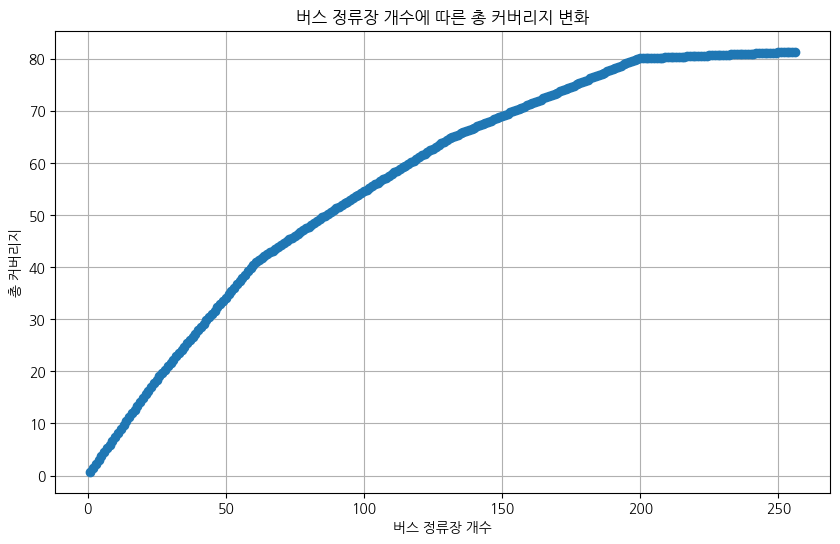

In [ ]:
# 최적의 정류장 개수를 찾기 위한 범위 설정
facility_range = range(1, num_stations + 1)  # 1개부터 모든 정류장까지

coverage_values = []

for num in facility_range:
    # OR-Tools 선형 프로그래밍 솔버 초기화
    solver = pywraplp.Solver.CreateSolver('SCIP')

    if not solver:
        raise Exception("Solver not found.")

    # 변수: 각 정류장이 선택되었는지 여부 (0 또는 1)
    x = [solver.IntVar(0, 1, f'x_{i}') for i in range(num_stations)]

    # 목적 함수: 커버되는 수요의 최대화
    objective = solver.Objective()
    for j in range(num_stations):
        for i in range(num_stations):
            if coverage_matrix[i][j]:
                objective.SetCoefficient(x[i], df.loc[j, '종합중요도'])
    objective.SetMaximization()

    # 제약 조건: 선택할 정류장 수는 num
    solver.Add(solver.Sum(x) == num)

    # 문제 해결
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        coverage = objective.Value()
        coverage_values.append(coverage)
        print(f'Bus Stops: {num}, Total Coverage: {coverage:.4f}')
    else:
        coverage_values.append(0)
        print(f'Bus Stops: {num}, No optimal solution found.')

# 커버리지 변화 시각화
plt.figure(figsize=(10,6))
plt.plot(facility_range, coverage_values, marker='o')
plt.xlabel('버스 정류장 개수')
plt.ylabel('총 커버리지')
plt.title('버스 정류장 개수에 따른 총 커버리지 변화')
plt.grid(True)
plt.show()


"최적의 버스정류장 개수"를 찾기 위해서는 여러 개의 num_facilities 값을 시도하여 커버리지의 변화를 관찰하고, 커버리지 증가율이 급격히 감소하는 지점을 찾는 것이 일반적입니다. 이를 엘보우(Elbow) 방법이라고 합니다.

## 결과 시각화

In [ ]:
# 지도 중심 설정 (데이터의 평균 위도와 경도)
center_lat = df['위도'].mean()
center_lon = df['경도'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# 모든 정류장 표시 (파란색 마커)
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=row['버스정류장명']
    ).add_to(m)

# 선택된 정류장 표시 (빨간색 마커)
for station in selected_stations:
    row = df[df['버스정류장명'] == station].iloc[0]
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['버스정류장명'],
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# 지도 저장 및 표시
m.save('selected_bus_stations.html')
m  # Jupyter Notebook에서 지도를 직접 표시
print("선택된 정류장이 표시된 지도가 'selected_bus_stations.html'로 저장되었습니다.")


선택된 정류장이 표시된 지도가 'selected_bus_stations.html'로 저장되었습니다.


In [ ]:
m

### 결과 시각화 (커버리지 영역 포함)

In [ ]:
# 지도 중심 설정 (데이터의 평균 위도와 경도)
center_lat = df['위도'].mean()
center_lon = df['경도'].mean()
m1 = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# 모든 정류장 표시 (파란색 마커)
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=row['버스정류장명']
    ).add_to(m1)

# 선택된 정류장 표시 (빨간색 마커) 및 커버리지 반경 표시 (동그라미)
for station in selected_stations:
    row = df[df['버스정류장명'] == station].iloc[0]

    # 선택된 정류장 마커 (빨간색)
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"{row['버스정류장명']}<br>종합중요도: {row['종합중요도']:.4f}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m1)

    # 커버리지 반경 표시 (동그라미)
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=coverage_radius,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.1
    ).add_to(m1)

# 지도 저장 및 표시
m1.save('selected_bus_stations.html')
m1  # Jupyter Notebook에서 지도를 직접 표시
print("선택된 정류장이 표시된 지도가 'selected_bus_stations.html'로 저장되었습니다.")


선택된 정류장이 표시된 지도가 'selected_bus_stations.html'로 저장되었습니다.


In [ ]:
m1